# Evaluation

## Grid Search Hyper Parameter

## Emoji Error
To Evaluate the Prediction of Emojis, we have to compare different evaluation criteria. On the one hand our sentiment prediction is a position in the 3-dim hyperspace (3dsh). The provided emojis are the closest neigbours in this 3-dim sentiment space. We learn a regression problem, s.t. we minimize the error of distance between predicted point in 3dsh and the teacher point in 3dsh. In addition it is insteresting which other emojis are predicted and are also provided in the prediction. So if the teacher prediction is a kissing smily and this explicit emoji is in the prediction only at 6th position, this can be a large error if the 5 higher ranked predictions are emojis with larger difference in sentimental context but if the other 5 are also kissing smiließ only with i.e. additional closed eyes etc. this error is kind of ignorable

### Regression Error
To evaluate the regression error i provide some methods to get a feeling for the distances in 3-dim sentimental hyperspace:

In [34]:
import numpy as np
from pprint import pprint as pp
import sys
sys.path.append("..")
import Tools.Emoji_Distance as ed

#from Tools.Emoji_Distance import sentiment_vector_to_emoji
#from Tools.Emoji_Distance import emoji_to_sentiment_vector

In [183]:
#Alternative Emoji List
lookup_emojis = ['😂',
 '😭',
 '😍',
 '😩',
 '😊',
 '😘',
 '🙏',
 '🙌',
 '😉',
 '😁',
 '😅',
 '😎',
 '😢',
 '😒',
 '😏',
 '😌',
 '😔',
 '😋',
 '😀',
 '😤']

In [184]:
def emoji_neighbourhood_with_distance(emoji, emojis):
    distances = list()
    for e in emojis:
        distances.append(ed.emoji_distance(emoji,e))
    dist = np.array(distances)
    rank = np.argsort(dist)
    tmp_emojis = emojis[rank]
    tmp_dist = dist[rank]
    
    output = ""#emoji+": "
    #build output
    for i in range(len(tmp_emojis)):
        output=output+" "+tmp_emojis[i]+"("+"{:1.3f}".format(tmp_dist[i])+"),"
    return output

#### Test for a couple of emojis:

In [185]:
#test set
emojis = ed.list_emoticon_emojis
for e in emojis:
    print(emoji_neighbourhood_with_distance(e,emojis))
    print("---------------------------------------------------")        

 😂(0.000), 😱(0.022), 😬(0.024), 🙇(0.055), 😈(0.061), 😹(0.063), 😅(0.067), 😥(0.086), 🙉(0.091), 😵(0.096), 😯(0.108), 😮(0.108), 🙀(0.109), 😟(0.126), 😼(0.129), 😆(0.135), 😄(0.144), 😝(0.149), 😳(0.153), 🙈(0.159), 😁(0.163), 😸(0.164), 😢(0.169), 🙊(0.170), 😜(0.172), 😉(0.184), 😎(0.193), 🙋(0.195), 😌(0.195), 😺(0.197), 😧(0.202), 😲(0.206), 🙆(0.207), 😏(0.211), 🙏(0.217), 😴(0.221), 😪(0.229), 😓(0.229), 😭(0.236), 😃(0.239), 😰(0.241), 🙌(0.247), 😀(0.250), 😨(0.257), 😶(0.259), 😇(0.269), 😔(0.272), 😛(0.283), 😞(0.285), 🙎(0.285), 😷(0.288), 😻(0.289), 😋(0.292), 😫(0.293), 😖(0.293), 🙅(0.302), 😽(0.303), 😊(0.305), 😤(0.308), 😍(0.333), 😡(0.354), 😘(0.358), 😣(0.362), 😚(0.367), 😑(0.379), 😠(0.396), 😗(0.407), 😙(0.423), 🙍(0.428), 😦(0.431), 😿(0.434), 😐(0.434), 😩(0.434), 😒(0.436), 😾(0.444), 😕(0.453),
---------------------------------------------------
 😍(0.000), 😊(0.032), 😘(0.036), 😚(0.043), 😻(0.048), 😛(0.050), 😋(0.078), 😇(0.081), 🙌(0.086), 😀(0.090), 😙(0.094), 😽(0.095), 😗(0.112), 😃(0.130), 😌(0.139), 🙋(0.139), 😎(0.162), 🙊(0.167), 🙆(0.16

### Prediction Distance

#### Read in stored sentiment predictions

In [186]:
import pandas as pd

df = pd.read_csv("test.csv")
df.head()

Unnamed: 0                                               text teacher  \
0       35671  I feel like I care so much more in every situa...       😂   
1       25683  I did not meat to add that '2' there...havent ...       😂   
2        8985                                          never…          😊   
3        5410         Lmao on me!!! Wtf was he supposed to say         😂   
4       62611   This dude always help me get through my schoo...       😊   

                                   teacher_sentiment predict  \
0  [0.46813021474490496, 0.24716181096977158, 0.2...       😢   
1  [0.46813021474490496, 0.24716181096977158, 0.2...       😂   
2  [0.7040175768989329, 0.059322033898305086, 0.2...       😂   
3  [0.46813021474490496, 0.24716181096977158, 0.2...       😭   
4  [0.7040175768989329, 0.059322033898305086, 0.2...       😂   

                                 predicted_sentiment  
0  [0.3881330192089081, 0.34921327233314514, 0.24...  
1  [0.477517306804657, 0.2263115793466568, 0.2805...  
2  [0.4780172109603882, 0.24580059945583344, 0.25...  
3  [0.3319989740848541, 0.38802555203437805, 0.23...  
4  [0.471467524766922, 0.19387008249759674, 0.299...

In [195]:

#np.array([x for x  in df['teacher_sentiment']])
#[x.tolist() for x in df['teacher_sentiment'].]
teacher_sents_raw = df['teacher_sentiment']
teacher_sents = np.array([np.fromstring(x.replace('[','').replace(']',''),dtype=float, sep=',') for x in teacher_sents_raw])

prediction_sents_raw = df['predicted_sentiment']
prediction_sents = np.array([np.fromstring(x.replace('[','').replace(']',''),dtype=float, sep=',') for x in prediction_sents_raw])

teacher_emojis = np.array(df["teacher"])

texts = np.array(df["text"])
#teacher_emojis[:20]
#teacher_emojis
#teacher_sents_raw = df['teacher_sentiment']
#teacher_sents = np.array([np.fromstring(x.replace('[','').replace(']',''),dtype=float, sep=',') for x in teacher_sents_raw])



In [209]:
import sys
def visualize_prediction_distance(teacher_vectors, predicted_vectors, teacher_emojis, emoji_dictionary):
    
    rank_distribution = {}
    ranks = []
    
    for i in range(len(predicted_vectors)):
        predicted_vector = predicted_vectors[i]
        teached_vector = teacher_vectors[i]
        error_dist = np.linalg.norm(predicted_vector-teached_vector)
        distances = []
        emojis = []
        for emoji, vect in emoji_dictionary.items():
            distances.append(np.linalg.norm(predicted_vector-vect))
            emojis.append(emoji)
        rank_dist = np.argsort(distances)
                
        emojis_sorted = np.array(emojis)[rank_dist]
        
        #calc rank
        rank = 0
        other_emojis = ""
        found = False
        for e in emojis_sorted:
            if(e != teacher_emojis[i]):
                rank+=1
                other_emojis+=e
            else:
                found = True
                break
        if not found:
            sys.stderr.write("ERROR: no match found")
            
        
        if not rank in rank_distribution:
            rank_distribution[rank] = 0
        rank_distribution[rank]+=1
        
        ranks.append(rank)
        
        outputstring = "s"+str(i)+" teacher "+teacher_emojis[i]+" distErr = "+ str(error_dist)+" rankErr = "+str(rank)+" wrong predictions"+str(other_emojis)+" with sentence: "+ str(texts[i])
        print(outputstring)
    print(rank_distribution)
    return ranks, rank_distribution
        #break
                
        
            
    

In [211]:
tmp_dics = {}
for e,v in ed.data.items():
    if(e in lookup_emojis):
        tmp_dics[e] = ed.data[e]

ranks, rank_distribution = visualize_prediction_distance(teacher_sents, prediction_sents, teacher_emojis, tmp_dics)

s0 teacher 😂 distErr = 0.135250189411 rankErr = 3 wrong predictions😢😭😅 with sentence: I feel like I care so much more in every situation 
s1 teacher 😂 distErr = 0.0232494287299 rankErr = 0 wrong predictions with sentence: I did not meat to add that '2' there...havent seen the first seasin either..
s2 teacher 😊 distErr = 0.293675375994 rankErr = 14 wrong predictions😂😅😁😢😌😉😎😏🙏🙌😭😀😔😋 with sentence: never…   
s3 teacher 😂 distErr = 0.203287779655 rankErr = 5 wrong predictions😭😢😔😤😅 with sentence: Lmao on me!!! Wtf was he supposed to say  
s4 teacher 😊 distErr = 0.276024362942 rankErr = 12 wrong predictions😂😅😁😉😎🙏😏😌😀😢🙌😋 with sentence:  This dude always help me get through my school dayz with his music
s5 teacher 😊 distErr = 0.0787353518861 rankErr = 5 wrong predictions😀🙌😌😎😋 with sentence:  Happy B'Day  Sir
s6 teacher 🙏 distErr = 0.245537837382 rankErr = 10 wrong predictions😂😅😢😁😭😉😌😎😏😔 with sentence:  You need some good old fashioned Swedish Jesus
s7 teacher 😅 distErr = 0.143577936 rankErr = 4 wr

s235 teacher 😘 distErr = 0.206327916889 rankErr = 12 wrong predictions😁😌😎😉🙌😀😋😊😂😍😅🙏 with sentence:  Nice one.... 
s236 teacher 😩 distErr = 0.412815432796 rankErr = 18 wrong predictions😂😅😢😁😉😌😎😭😏🙏😔🙌😀😤😋😊😍😘 with sentence: It's just been less than 3 hours. What am I doing? 
s237 teacher 😊 distErr = 0.237010343385 rankErr = 12 wrong predictions😂😁😅😌😎😉🙌😀🙏😏😢😋 with sentence:   Thanks for the reply 
s238 teacher 😏 distErr = 0.360758097328 rankErr = 9 wrong predictions😢😭😔😤😅😂😩😒😁 with sentence:  ......tomorrow my Friday 
s239 teacher 😭 distErr = 0.0209416200283 rankErr = 0 wrong predictions with sentence:  what's wrong 
s240 teacher 😂 distErr = 0.0248116849751 rankErr = 0 wrong predictions with sentence:  Dear Lord! Give that kid a break, Jaeeee 
s241 teacher 😊 distErr = 0.113586013657 rankErr = 7 wrong predictions😎😁😀😌🙌😉😋 with sentence:    Congratulations Mrs. Rodon! Thanks for sharing such a great photo.  We’… 
s242 teacher 😂 distErr = 0.0489716990614 rankErr = 0 wrong predictions with sentence:  Sp

s852 teacher 😍 distErr = 0.089630773022 rankErr = 6 wrong predictions🙌😀😌😊😋😎 with sentence: the weekend de sza 
s853 teacher 😭 distErr = 0.0871313412112 rankErr = 1 wrong predictions😢 with sentence: I threw my phone!  
s854 teacher 😍 distErr = 0.246037069267 rankErr = 12 wrong predictions😁😂😌😎😉😅🙌😀🙏😋😏😊 with sentence: got to be under baby all day 
s855 teacher 😘 distErr = 0.101894071817 rankErr = 7 wrong predictions🙌😀😊😋😍😌😎 with sentence: thanks for the pic   gonna put it to good use later
s856 teacher 😀 distErr = 0.0291927201009 rankErr = 1 wrong predictions🙌 with sentence: Happy All Saints Day!  
s857 teacher 😂 distErr = 0.0251473505033 rankErr = 0 wrong predictions with sentence:  I mean you can if you want I don’t mind 
s858 teacher 😂 distErr = 0.0330062026087 rankErr = 0 wrong predictions with sentence:  the truth
s859 teacher 😊 distErr = 0.153608936066 rankErr = 7 wrong predictions😁😌😎🙌😉😀😋 with sentence: goodmorning 
s860 teacher 😂 distErr = 0.0319000709825 rankErr = 0 wrong prediction

s1868 teacher 😂 distErr = 0.171184053564 rankErr = 5 wrong predictions😢😭😔😅😤 with sentence: Let that lil nigga know what he’s missing on 
s1869 teacher 😂 distErr = 0.0660990116665 rankErr = 0 wrong predictions with sentence:  Doesnae make him a film buff just like kicking a ball didnae make him a fabulous footballer either 
s1870 teacher 😭 distErr = 0.392946100873 rankErr = 15 wrong predictions😁😎😌😀🙌😉😋😊😂😍🙏😅😘😏😢 with sentence: See you tonight   ❤️❤️
s1871 teacher 😉 distErr = 0.0847601740987 rankErr = 3 wrong predictions😁😎😌 with sentence:   Your talks are always great, and the Shenkansen are fabulous -- so why do you look so worried?
s1872 teacher 😒 distErr = 0.415644903136 rankErr = 19 wrong predictions😂😅😢😁😉😌😎😭😏🙏😔🙌😀😤😋😊😍😘😩 with sentence: Same. Back to drinking this week cuz no  
s1873 teacher 😍 distErr = 0.259642208343 rankErr = 13 wrong predictions😂😁😉😎😌😅🙏😀🙌😏😋😊😢 with sentence:  yup yup 
s1874 teacher 😍 distErr = 0.102320944206 rankErr = 4 wrong predictions🙌😌😀😊 with sentence: Copic art 
s187

In [220]:
import operator
sorted_rank_distribution = sorted(rank_distribution.items(),key=operator.itemgetter(0))

print(sorted_rank_distribution)

[(0, 556), (1, 213), (2, 166), (3, 169), (4, 122), (5, 144), (6, 84), (7, 139), (8, 112), (9, 94), (10, 131), (11, 116), (12, 73), (13, 58), (14, 52), (15, 98), (16, 85), (17, 50), (18, 123), (19, 35)]


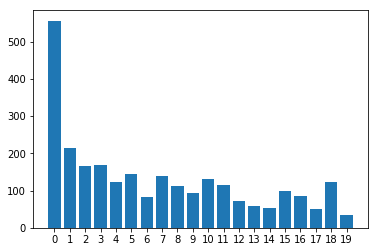

In [237]:
import matplotlib.pyplot as plt

D = rank_distribution
sorted_indices = np.argsort(list(D.keys()))

plt.bar(range(len(D)), np.array(list(D.values()))[sorted_indices], align='center')
plt.xticks(range(len(D)), np.array(list(D.keys()))[sorted_indices])
#plt.bar(range(len(D)), D[:][1], align='center')
#plt.xticks(range(len(D)), D[:][0])

plt.show()

In [236]:
sorted_indices

array([0])